<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Benford's Law

_Authors: Riley Dallas (AUS)_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 999)

## Learning Objectives
---

- Understand what Benford's law is
- Use Benford's law to find anomalies within a dataset.


## About Benford's Law
---

> Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on. - From [Wikipedia](https://en.wikipedia.org/wiki/Benford%27s_law)

Benford's law has many great applications in exploratory data analysis. To give an example, forensic accountants typically use Benford's law to screen for irregularities in financial reports. Financial datasets tend to follow Benford's law **unless human intervention is involved**, which can sometimes lead to fraud.

For today's lesson, we'll apply Benford's law to the [City of Austin's Online Checkbook](https://data.austintexas.gov/Budget-and-Finance/Austin-Finance-Online-eCheckbook/8c6z-qnmj) to explore anomalies in the data.

## Challenge: Bar chart
---

For digits 1-9, create a bar chart that shows the expected percentage of first digits in the dataset according to Benford's law:

$P(d)=\log_{10}(d+1)-\log_{10}(d)=\log_{10} \left(\frac{d+1}{d}\right)=\log_{10} \left(1+\frac{1}{d}\right)$

For example, we expect to see numbers with a 1 as the first digit roughly 30% of the time:

$P(d)=\log_{10}(1+1)-\log_{10}(1) = .301$

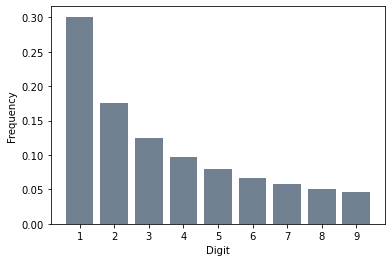

In [15]:
digits = list(range(1, 10))
benford = [np.log10(1 + 1/d) for d in digits]

plt.bar(x = range(1, 10), height = benford, color = 'slategrey')
plt.xticks(digits)
plt.xlabel('Digit')
plt.ylabel('Frequency'); 

## Load the dataset
---

We've already downloaded a csv from the City of Austin's website (`datasets/Austin_Finance_Online_eCheckbook.csv`). Load that into a `pandas` DataFrame.

In [16]:
df = pd.read_csv('./datasets/Austin_Finance_Online_eCheckbook.csv')

C:\Users\Mary\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,12,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11


## Data cleaning
---

Remove all rows where the `AMOUNT` is less than 10 dollars. This will clean up the data by removing small amounts (including refunds), without sacrificing a lot of data.

In [21]:
df = df.loc[df['AMOUNT'] >= 10, :]
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11


## Feature Engineering: Add a `FIRST_DIGIT` category
---

Create a column called `FIRST_DIGIT` corresponding to the first digit from the `AMOUNT` column.

In [25]:
df['first_digit'] = df['AMOUNT'].map(lambda a:str(a)[0]).astype(int)

In [26]:
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT,first_digit
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12,1,1
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7,4,4
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9,8,8
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9,1,1
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11,1,1


## Plot Actual Percentages vs Expected (Benford) Percentanges
---

Next we'll plot a line chart of actual percentages against the expected Benford percentages as a bar chart.

In [31]:
actuals = df['first_digit'].value_counts(normalize = True)
actuals = actuals.sort_index()

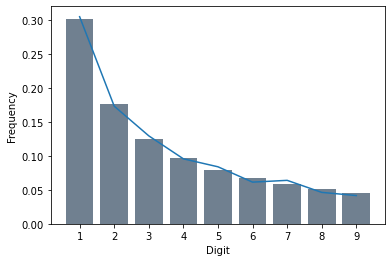

In [32]:
plt.bar(x = range(1, 10), height = benford, color = 'slategrey')
plt.plot(actuals)
plt.xticks(digits)
plt.xlabel('Digit')
plt.ylabel('Frequency'); 

## Evaluating Benford's Law by Department
---

Let's repeat the chart above, only this time we'll create a line/bar chart for each department.

To get started, create a list of deparment names that have written at least 1,000 checks.

In [39]:
checks_by_dept = df['DEPT_NM'].value_counts()
large_depts = checks_by_dept[checks_by_dept >= 1000].index
large_depts.shape

(25,)

In [40]:
large_depts

Index(['Austin Energy', 'Austin Water', 'Parks & Recreation',
       'Public Works - Transportation', 'Fleet Services', 'Police',
       'Austin Public Health', 'Watershed Protection',
       'Austin Resource Recovery', 'Aviation', 'Building Services',
       'Communications & Technology Management', 'Austin Public Library',
       'Economic Development', 'Emergency Medical Services',
       'Austin Transportation', 'Austin Convention Center',
       'Financial Services', 'Fire', 'Human Resources', 'Wireless',
       'Austin Code', 'Neighborhood Housing & Community Development',
       'Development Services', 'Law'],
      dtype='object')

Now we'll plot actuals vs expected for each of those departments

In [42]:
#fig, axes = plt.subplots(nrows = len(large_depts), figsize = (10, 125))
#run by itself to check the subplot shape

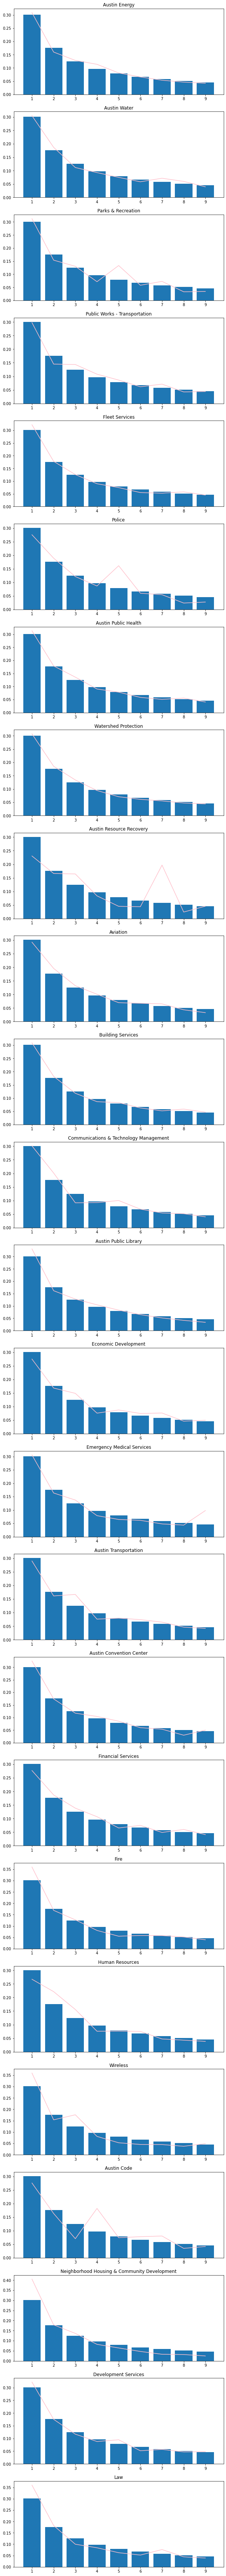

In [46]:
fig, axes = plt.subplots(nrows = len(large_depts), figsize = (10, 125))

for i, dept in enumerate(large_depts):
    dept_checks = df.loc[df['DEPT_NM'] == dept,
                            'first_digit'].value_counts(normalize = True).sort_index()
    axes[i].bar(range(1, 10), benford)
    axes[i].plot(dept_checks, color = 'pink')
    axes[i].set_xticks(digits)
    axes[i].set_title(dept)

## Deep dive
---

We can see a few anomalies with Police, EMS, Austin Resource Recovery and Parks & Rec. Let's dig deeper and investigate the root causes. For this exercise, pick a department that is deviating from Benford's law and find out why.

In [53]:
df[(df['DEPT_NM'] == 'Austin Resource Recovery') & (df['FIRST_DIGIT'] == 7)].head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT,first_digit
28,2017,2,15,Austin Resource Recovery,5040,Austin Resource Recovery Fund,5DVS,Waste Diversion,5ZRW,Strategic Initiatives,152,Contractuals,6821,Home Composting Rebate,"G.O. Landscape, Inc.",VS0000026177,V,GAX,1500,16102601431,NaN,NaN,11/06/0016,Paid,1,0,1,NaN,NaN,NaN,Home Composting Rebate,75.0,2016,11,7,7
101,2017,4,15,Austin Resource Recovery,5040,Austin Resource Recovery Fund,5DVS,Waste Diversion,5ZRW,Strategic Initiatives,152,Contractuals,6821,Home Composting Rebate,"HLAVINKA, THERESA",MIS0000004,V,GAX,1500,17011705738,NaN,NaN,01/29/0017,Paid,8,0,1,NaN,NaN,NaN,Home Composting Rebate,75.0,2017,1,7,7
102,2017,12,15,Austin Resource Recovery,5040,Austin Resource Recovery Fund,5DVS,Waste Diversion,5ZRW,Strategic Initiatives,152,Contractuals,6821,Home Composting Rebate,Track Trading Co.,V00000902605,V,GAX,1500,17082418885,NaN,NaN,09/08/0017,Paid,1,0,2,NaN,NaN,NaN,Home Composting Rebate,75.0,2017,9,7,7
131,2017,12,15,Austin Resource Recovery,4800,ARR-Austin Resource Recovery Cip,0507,Landfill Capital Requirements,0714,Fm 812 Landfill Let Down Repairs,152,Contractuals,5590,Services-engineering,"APTIM ENVIRONMENTAL & INFRASTRUCTURE, INC.",SHA8306590,V,PRM,6100,17091333479,91842,Engineering Consulting,09/16/0017,Paid,1,2,1,DO,6100.0,17032708997,Engineering Consulting,7500.0,2017,9,7,7
191,2017,9,15,Austin Resource Recovery,5040,Austin Resource Recovery Fund,5DVS,Waste Diversion,5ZRW,Strategic Initiatives,152,Contractuals,6821,Home Composting Rebate,THE NATURAL GARDENER,NAT8309531,V,GAX,1500,17061314905,NaN,NaN,06/25/0017,Paid,1,0,4,NaN,NaN,NaN,Home Composting Rebate,75.0,2017,6,7,7


In [54]:
df[(df['DEPT_NM'] == 'Austin Resource Recovery') & (df['FIRST_DIGIT'] == 7)]['OBJ_NM'].value_counts()

Home Composting Rebate            490
Telephone-cellular phones          48
Zero Waste Event Rebate            14
Services-other                     14
Mileage reimbursements             10
Services-environmnt assessment      8
Services-medical/surgical           8
Services-landfill services          8
Consultant-others                   7
Educational travel                  5
Advertising/publication             5
Clothing/clothing material          4
Professional registration           3
Services-collection costs           3
Minor computer hardware             3
Services-security                   2
Services-engineering                2
Maintenance-buildings               2
Software                            1
Seminar/training fees               1
Educational/promotional             1
Printing/binding/photo/repr         1
Commercial Recycling Rebate         1
Transportation-city veh fuel        1
Services-translators                1
Maintenance-other equipment         1
Services-gar

In [56]:
df[(df['DEPT_NM'] == 'Police') & (df['FIRST_DIGIT'] == 5)]['OBJ_NM'].value_counts()

Small tools/minor equipment       369
Services-other                     98
Maintenance-other equipment        35
Gas/heating fuels                  32
Seminar/training fees              20
Police supplies                    19
Educational travel                 18
Rental-other equipment             15
Medical/dental supplies            12
Explosives/blasting                 7
Printing/binding/photo/repr         7
Educational/promotional             6
Office supplies                     6
Food/Ice                            5
Identification                      5
Garbage/refuse collection           4
Mileage reimbursements              4
Clothing/clothing material          4
Memberships                         4
Maintenance-computer software       3
Services-medical/surgical           3
Other Equipment                     2
Consultant-others                   2
Minor computer hardware             2
Expense refunds                     2
Maintenance-grounds                 2
Awards and R

In [61]:
df[(df['DEPT_NM'] == 'Neighborhood Housing & Community Development') & (df['FIRST_DIGIT'] == 1)]['ACTG_LN_DSCR'].value_counts()

Building Construction, Residential (Apartments, etc.)           259
Lead and Asbestos Inspection Services                            46
Services-testing                                                 25
Family and Social Services                                       24
Water service                                                    18
Housing Consulting                                               17
Wastewater service                                               17
Services-closing/title insur                                     15
Inspection Services, Construction Type                           15
Grants to others-NHC nonsubre                                    11
Loan Proceeds Disbursements                                      11
Services-garbage/recycling clt                                   10
Gas/heating fuels                                                10
Transportation fee expense                                       10
Public Information Services                     